In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, Convolution2D
from tensorflow.keras.models import Model
tf.executing_eagerly()

True

In [2]:
X_train =  np.load('train_images.npy', allow_pickle=True)
y_train =  np.load('train_labels.npy', allow_pickle=True)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

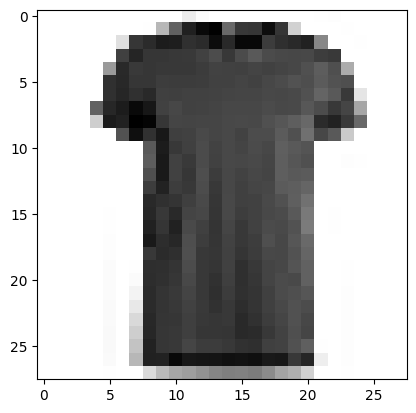

This is a T-shirt/top


In [3]:
# show image
data_idx = 17
plt.imshow(X_train[data_idx,:,:]/255, cmap='binary')
plt.show()
class_number = y_train[data_idx]
class_text = class_names[class_number]
print(f'This is a {class_text}')

In [4]:
# data prep
X_train = X_train/255
X_train = X_train.reshape(-1, 784)

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
encoder = OneHotEncoder(sparse_output=False)

y_train_shaped = y_train.reshape(-1,1)

encoder.fit(y_train_shaped)
encoded = encoder.transform(y_train_shaped)

y_train_ohe = np.zeros((68000,10))
y_train_ohe[np.arange(68000), y_train] = 1

In [7]:
# # prep validation data
# X_val =  np.load('val_images.npy', allow_pickle=True)
# # dele på 255 og reshape
# X_val = X_val/255
# X_val = X_val.reshape(-1,784)



In [8]:
input_layer = Input(shape=(784,))
layer_1 = Dense(784, activation='relu')(input_layer)
layer_1_d = Dropout(0.5)(layer_1)
layer_2 = Dense(256,activation='relu')(layer_1)
layer_2_d = Dropout(0.5)(layer_2)
layer_3 = Dense(128,activation='relu')(layer_2)
layer_3_d = Dropout(0.5)(layer_3)
layer_4 = Dense(32,activation='relu')(layer_3)
layer_4_d = Dropout(0.5)(layer_4)
layer_5 = Dense(10,activation='relu')(layer_4)
output_layer = Dense(10,activation='softmax')(layer_5)

model_3 = Model(inputs=input_layer, outputs=output_layer)
model_3.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
print(X_train.size)
print(encoded.size)

53312000
680000


In [11]:
##Marius
# X_train_splitted, X_temp, y_train_splitted, y_temp = train_test_split(X_train, encoded, test_size=0.2)

# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2)



In [12]:
y_train = encoded

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
 
# X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [13]:
# history = model_3.fit(X_train_splitted, y_train_splitted, batch_size=128, epochs=1024, validation_data=(X_val,y_val))

#Magnus ver
history = model_3.fit(X_train, y_train, batch_size=128, epochs=32, validation_data=(X_test,y_test))

Epoch 1/32


425/425 [==============================] - 5s 9ms/step - loss: 0.7512 - accuracy: 0.7410 - val_loss: 0.5035 - val_accuracy: 0.8240
Epoch 2/32
425/425 [==============================] - 4s 9ms/step - loss: 0.4001 - accuracy: 0.8566 - val_loss: 0.3693 - val_accuracy: 0.8679
Epoch 3/32
425/425 [==============================] - 4s 9ms/step - loss: 0.3490 - accuracy: 0.8736 - val_loss: 0.3590 - val_accuracy: 0.8730
Epoch 4/32
425/425 [==============================] - 4s 9ms/step - loss: 0.3183 - accuracy: 0.8831 - val_loss: 0.3262 - val_accuracy: 0.8801
Epoch 5/32
425/425 [==============================] - 4s 9ms/step - loss: 0.3020 - accuracy: 0.8883 - val_loss: 0.3555 - val_accuracy: 0.8702
Epoch 6/32
425/425 [==============================] - 4s 9ms/step - loss: 0.2816 - accuracy: 0.8957 - val_loss: 0.3281 - val_accuracy: 0.8848
Epoch 7/32
425/425 [==============================] - 4s 9ms/step - loss: 0.2694 - accuracy: 0.8996 - val_loss: 0.3505 - val_accuracy: 0.8715
Epoc

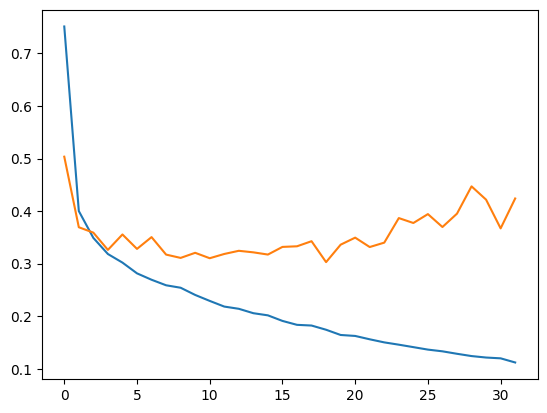

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

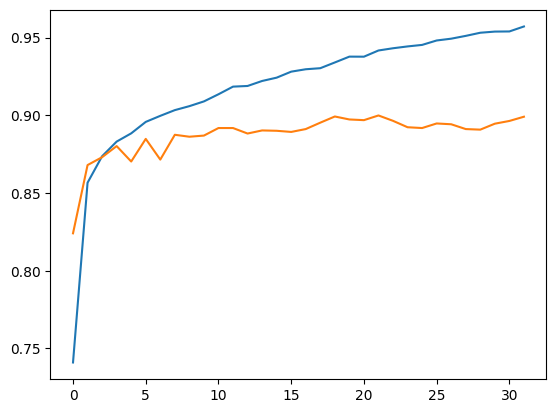

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [16]:
history.history["accuracy"]

[0.7409558892250061,
 0.8565992712974548,
 0.873639702796936,
 0.8830514550209045,
 0.8883455991744995,
 0.8957169055938721,
 0.8996139764785767,
 0.9032904505729675,
 0.905845582485199,
 0.9088970422744751,
 0.9134926199913025,
 0.918400764465332,
 0.9188235402107239,
 0.9220404624938965,
 0.9241728186607361,
 0.9280331134796143,
 0.9295772314071655,
 0.9302573800086975,
 0.9339522123336792,
 0.9377021789550781,
 0.9376654624938965,
 0.9416543841362,
 0.9430882334709167,
 0.9442647099494934,
 0.9452389478683472,
 0.9480882287025452,
 0.949246346950531,
 0.9510477781295776,
 0.9530698657035828,
 0.953805148601532,
 0.9538970589637756,
 0.9570955634117126]

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  3.,  6.,  8., 13.]),
 array([0.74095589, 0.76256986, 0.78418382, 0.80579779, 0.82741176,
        0.84902573, 0.87063969, 0.89225366, 0.91386763, 0.9354816 ,
        0.95709556]),
 <BarContainer object of 10 artists>)

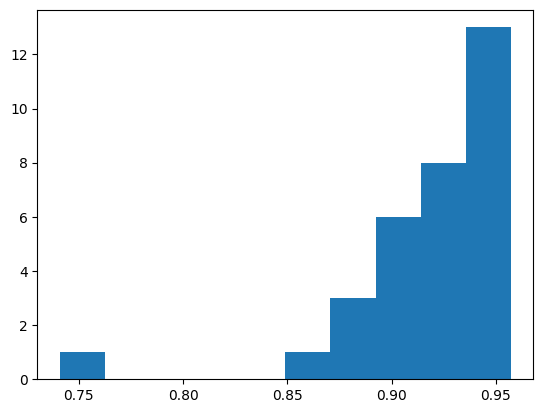

In [17]:
plt.hist(history.history["accuracy"])

In [18]:
prediction = model_3.predict(X_test)

425/425 [==============================] - 1s 1ms/step


In [19]:
prediction

array([[9.99962449e-01, 2.74935896e-09, 3.92122359e-12, ...,
        1.96380540e-14, 3.41481937e-05, 7.42414121e-18],
       [9.91062432e-09, 1.05436468e-08, 2.78852670e-03, ...,
        1.24501109e-09, 6.19281737e-10, 1.73146741e-08],
       [9.99992967e-01, 1.12354064e-10, 7.40538297e-08, ...,
        2.69796990e-10, 3.39347170e-12, 7.13452908e-10],
       ...,
       [1.92707734e-08, 3.16994544e-07, 3.24659882e-10, ...,
        7.87457247e-05, 2.16057686e-07, 9.99914885e-01],
       [3.90625837e-10, 6.55694100e-14, 8.98688922e-22, ...,
        3.67098828e-15, 1.00000000e+00, 1.04254734e-17],
       [1.10960156e-01, 3.49603011e-03, 3.17186788e-02, ...,
        1.46009689e-02, 7.22545922e-01, 1.57186447e-03]], dtype=float32)

In [20]:
# predic validation data
X_validate = np.load('val_images.npy', allow_pickle=True)
# data prep
X_validate = X_validate/255
X_validate = X_validate.reshape(-1, 784)
# my_prediction = np.array([9,0,0,3,...])

prediction = model_3.predict(X_validate)

63/63 [==============================] - 0s 2ms/step


In [21]:
len(X_validate)

2000

In [22]:
prediction

array([[1.1838661e-02, 4.6392834e-06, 9.7958231e-01, ..., 4.6967684e-06,
        5.2521459e-06, 1.9510582e-04],
       [7.5965545e-05, 1.4991664e-07, 3.7692379e-07, ..., 2.4566691e-15,
        1.7105226e-08, 1.0875500e-12],
       [7.2491144e-05, 3.9961339e-08, 4.5460179e-06, ..., 9.7857040e-01,
        7.3100680e-05, 1.9675883e-02],
       ...,
       [3.3954559e-05, 2.3710716e-06, 6.0653514e-07, ..., 4.5862955e-14,
        1.6867030e-07, 2.5626329e-11],
       [5.1355815e-11, 1.6486501e-11, 1.3933337e-13, ..., 1.3321322e-06,
        7.0147159e-11, 9.9999869e-01],
       [7.5648532e-17, 1.0835300e-13, 3.3105374e-20, ..., 9.1882212e-15,
        4.0936820e-19, 1.3481886e-14]], dtype=float32)

In [23]:
np.round(prediction[0, :], 2)

# Get the index of the maximum value in each row
argmaxed = np.argmax(prediction, axis=1)
argmaxed

array([2, 3, 7, ..., 3, 9, 5], dtype=int64)

In [24]:
my_name = "Marius"
np.save(my_name+".npy", argmaxed)